In [18]:
import pandas as pd
import numpy as np

match = pd.read_csv('../data/tentative_genename_mapping.csv')

verified_RRMs = ['A1CF', 'HNRNPH3', 'HNRNPLL', 'NCL', 'NONO', 'PUF60', 'RBM17',
       'RBM19', 'RBM22', 'RBM24', 'RBM25', 'RBM38', 'RBM39', 'RBM5',
       'RBMS1', 'SRSF1', 'SRSF2', 'SRSF3', 'SYNCRIP', 'TIAL1']

def get_verified_reps(verified_RRMs, csv_file = 'decoder_reps_unaligned copy.csv', sep=','):
    
    ### Learned "hidden" representation ###
    hiddens=pd.read_csv(csv_file, index_col=0, sep=sep)
    try:
        hiddens['proteinID'] = [name.split('_')[0] for name in hiddens.name]
        hiddens = hiddens.drop('name', 1)
    except:
        hiddens['proteinID'] = [name.split('_')[0] for name in hiddens.index]

    #### get protein representation by summing ####
    protein_hiddens = hiddens.groupby('proteinID').sum()#/hiddens.groupby('proteinID').count()
    protein_hiddens.index = [geneID.split('.')[0] for geneID in protein_hiddens.index]
    protein_hiddens.index.names = ['proteinID']
    protein_hiddens['proteinID'] = protein_hiddens.index
    
    protein_matched = pd.merge(protein_hiddens, match, left_on='proteinID', right_on='From')
    protein_matched['protein_type'] = [protein_name.split('_')[0] for protein_name in protein_matched['To']]
    protein_matched.index  = protein_matched['protein_type']
    
    verified_RRMs  = protein_matched[[protein in verified_RRMs for protein in protein_matched['protein_type']]].drop(
['From', 'To', 'protein_type', 'proteinID'], 1)
    labels = verified_RRMs.index.values.tolist()
    values = verified_RRMs.values
    return labels, values

In [19]:
seq_l, seq_v = get_verified_reps(verified_RRMs, csv_file = 'Seq2Vec_64Dim.csv', sep='\t')
dec_un_l, dec_un_v = get_verified_reps(verified_RRMs, csv_file = 'decoder_reps_unaligned.csv')
dec_l, dec_v = get_verified_reps(verified_RRMs, csv_file = 'hiddens2.csv')
enc_un_l, enc_un_v = get_verified_reps(verified_RRMs, csv_file = 'encoder_reps_unaligned.csv')
enc_l, enc_v = get_verified_reps(verified_RRMs, csv_file = 'encoder_reps_aligned_24hrs.csv')
cho_l, cho_v = get_verified_reps(verified_RRMs, csv_file = 'CharLvlNMT_64_v1.csv', sep='\t')

In [ ]:
###  original data file, preprocessed while training to get rid of less populated positions ### 
combined_RRMs = pd.read_csv('combined_processed_RRM.csv', index_col=0)
combined_RRMs['proteinID'] = [ind.split('.')[0] for ind in combined_RRMs.index]

### matching file from and proteinID to geneID ###

In [9]:
import re
with open('../data/tentative_genename_mapping.tab', 'rb') as original_file:
    for i, line in enumerate(original_file):
        with open('../data/tentative_genename_mapping.csv', 'a') as new_file:
            line = re.sub(b'\t', b',', line)
            new_file.write(line.decode("utf-8") )

#### top 84 populated positions for verified RRMs, used to get learned representation ###

In [146]:
import pickle
vocab = pickle.load(open('vocab.pkl', 'rb')) 

In [281]:
RRM_matched = pd.merge(combined_RRMs, match, left_on='proteinID', right_on='From')
verified_RRM_df = RRM_matched[[to in verified_RRMs.index for to in RRM_matched['To']]]
verified_RRM_df = verified_RRM_df.rename(columns={'To': 'geneID'})
verified_RRM_df
verified_RRM_df = verified_RRM_df.set_index('geneID')
verified_RRM_df = verified_RRM_df.drop(['proteinID', 'From'], 1)
verified_RRM_df.to_csv('verified_RRMs.csv')

Verified RBP geneIDs:
    
'TIAL1', 
'NONO',
'NCL',
'HNRNPM',
'ELAVL1',
'HNRNPR',
'RBM12',
'ELAVL4',
'ELAVL3'
'HNRNPH3',
'CELF1',
'PABPC4',
'SYNCRIP',
'PUF60', 
'PABPC5', 
'RBM39', 
'RBPMS', 
'SPEN', 
'RBPMS2', 
'A1CF', 
'HNRNPAB', 
'HNRNPR', 
'SRSF2', 
'SRSF1', 'SRSF10', 'SRSF11', , 'SRSF12',, 'SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7',
       'SRSF9', 
    'RBM39', 'U2AF1', 'U2AF2', 'RBM23', 'RBM34', 'RBM19', 'RBM17', 'RBM5'

In [2]:
def get_RRM_group(starting_letters, num=20):
    group = protein_matched['protein_type'][[starting_letters in protein for protein in protein_matched['protein_type']]
                                           ].groupby('protein_type').count()
    group = group[group.sort_values(ascending=False)>num].index.values.astype(str)
    return group.tolist()

### These proteins are verified RBPs on http://www.genecards.org/ ###

In [17]:
verified_RRMs = get_RRM_group('SRSF') + get_RRM_group('RBM') + get_RRM_group('A1CF') + get_RRM_group('SPEN') +\
get_RRM_group('HNRN') + get_RRM_group('TIAL') + get_RRM_group('NONO')+ ['NCL'] + get_RRM_group('PABPC') + get_RRM_group('SYNCRIP')\
+ get_RRM_group('PUF') + get_RRM_group('U2AF')

In [18]:
verified_RRMs  = protein_matched[[protein in verified_RRMs for protein in protein_matched['protein_type']]].drop(
['From', 'To', 'protein_type', 'proteinID'], 1)

# import sys
# sys.path.append('../util/')
# from imp import reload
# import tsne
# reload(tsne)
# tsne.plot('Decoder', verified_RRMs.index.values.tolist(), verified_RRMs.values, perplexity=50)

In [111]:
tsne_projections = [] 
for rep in list_reps:
    tsne_projections.append(tsne.tsne(rep, perplexity=50))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 2.249858
[t-SNE] KL divergence after 75 iterations with early exaggeration: 0.051535
[t-SNE] Error after 100 iterations: 0.051535
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 1.241955
[t-SNE] KL divergence after 75 iterations with early exaggeration: 0.051929
[t-SNE] Error after 100 iterations: 0.051929
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 1.818223
[t-SNE] KL divergence after 75 iterations with early exaggeration: -0.002418
[t-SNE] Error after 100 iterations: -0.002418
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditi

In [20]:
%matplotlib auto
import sys
sys.path.append('../util/')
from imp import reload
import tsne
list_labels =[enc_l, enc_un_l, dec_l, dec_un_l, cho_l, seq_l]
list_reps = [enc_v, enc_un_v, dec_v, dec_un_v, cho_v, seq_v]
titles = ['Encoder Extracted Features (Aligned input)', 'Encoder Extracted Features (Unaligned input)', 
'Decoder Hidden State (Aligned input)', 'Decoder Hidden State (Unaligned input)', 
          'Character Level Encoder', 'Seq2Vec']
tsne_projections_2d = [] 
for rep in list_reps:
    tsne_projections_2d.append(tsne.tsne(rep, perplexity=50, n_components=2))

Using matplotlib backend: MacOSX
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 3.949785
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.229450
[t-SNE] Error after 175 iterations: 0.229450
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 2.204515
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.182366
[t-SNE] Error after 175 iterations: 0.182366
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 3.453816
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.246953
[t-SNE] Error after 175 iterations: 0.246953
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest nei

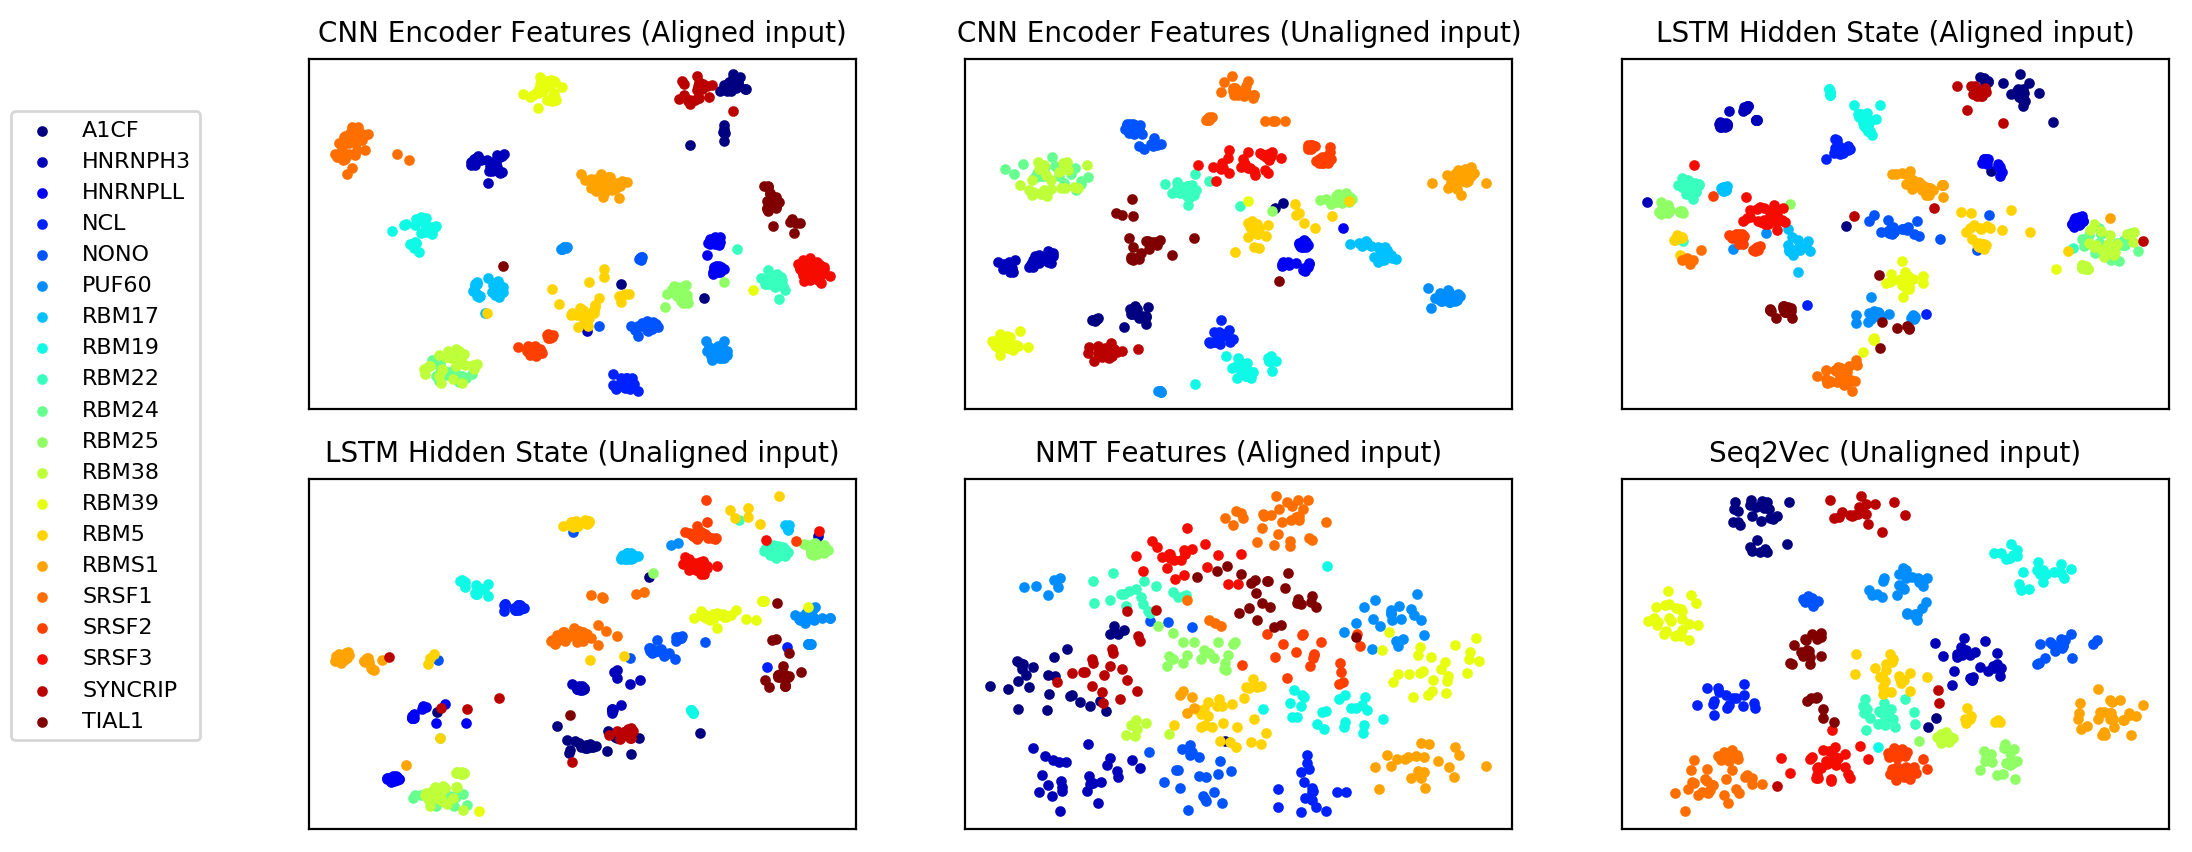

In [22]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def plot2d(plot_name, unique_labels, labels, tsne_projections, titles, 
    perplexity = 40, n_iter = 2000, n_components = 2): 

    ''' list int, str labels: color point according to this color 
      np.ndarray tsne_projection: [ Num of sequences X Dim of Latent Rep. ]
      take_first_n: only first n row will show in tsne projection 
    '''
    # color by label, 

    fig = plt.figure(figsize=(12, 5))
    #fig.subplots_adjust(top=1, bottom=0, left=0, right=1, wspace=0)
    colors = list(iter(cm.jet(np.linspace(0, 1, len(unique_labels)))))
    line_dict = {}
    for i, ts in enumerate(tsne_projections):
        ax = fig.add_subplot(2, 3, i+1)
        large_gene_symbol, unique_labels_filtered = [], []
        for l in unique_labels: 
            all_l_indices = [k for k,x in enumerate(labels[i]) if x == l]
            large_gene_symbol.append(all_l_indices)
            unique_labels_filtered.append(l)
        for j, (l, all_l_indices) in enumerate(zip(unique_labels_filtered, large_gene_symbol)):
            cur_color = colors[j]
            line_dict[j] = ax.scatter(
                ts[all_l_indices,0], 
                ts[all_l_indices,1],
                c= cur_color, label=l, s = 8)

        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.figlegend(line_dict.values(), unique_labels, fontsize=8, loc='center left')
    #ax = plt.gca()
    #legend = ax.get_legend()
    # ax.set_zlim(-10, 10)
    # ax.set_ylim(-10, 10)
    #fig.title(plot_name, fontsize=18)
    # ax.set_xlim(-10, 10)

    plt.savefig(plot_name, bbox_inches='tight')
    plt.show()

    return fig
titles = ['CNN Encoder Features (Aligned input)', 'CNN Encoder Features (Unaligned input)', 
'LSTM Hidden State (Aligned input)', 'LSTM Hidden State (Unaligned input)', 
          'NMT Features (Aligned input)', 'Seq2Vec (Unaligned input)']
plot2d('tSNE_2d_updated3.png', verified_RRMs, list_labels, tsne_projections_2d, titles)

Using matplotlib backend: MacOSX


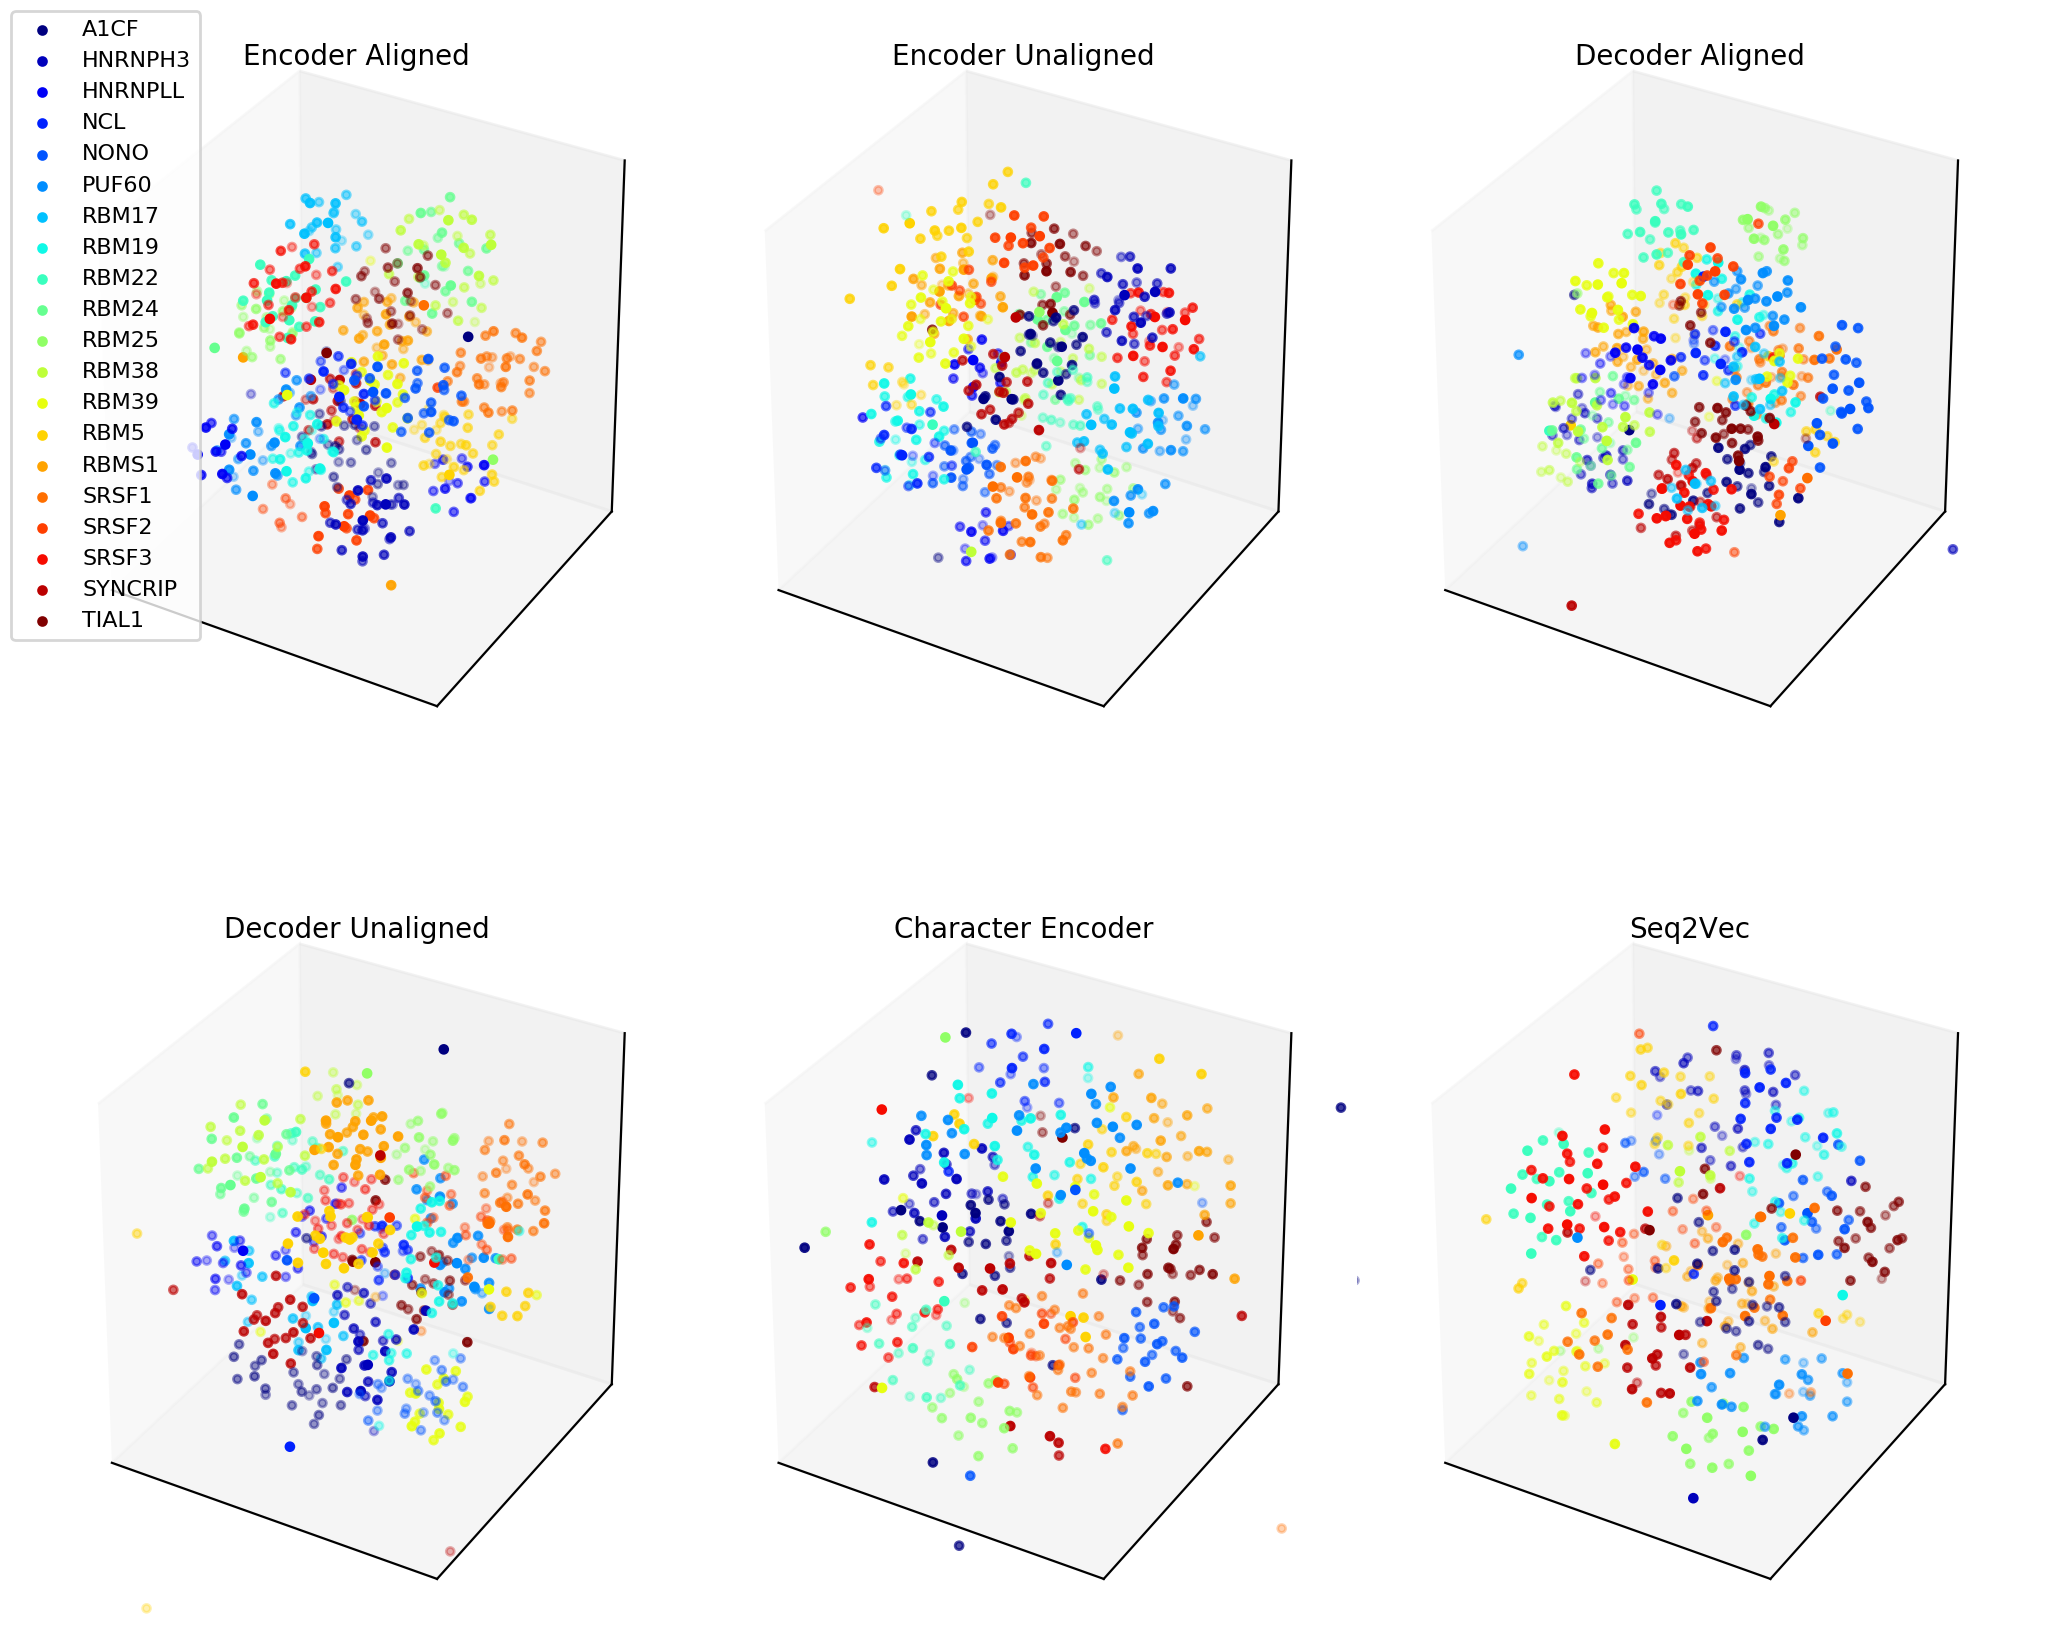

In [125]:
%matplotlib auto
import sys
sys.path.append('../util/')
from imp import reload
import tsne
reload(tsne)
list_labels =[enc_l, enc_un_l, dec_l, dec_un_l, cho_l, seq_l]
list_reps = [enc_v, enc_un_v, dec_v, dec_un_v, cho_v, seq_v]
titles = ['Encoder Aligned', 'Encoder Unaligned', 
'Decoder Aligned', 'Decoder Unaligned', 
          'Character Encoder', 'Seq2Vec']
# tsne.plot3d('Decoder unaligned', verified_RRMs.index.values.tolist(), verified_RRMs.values, perplexity=100)
tsne.plot3d('tSNE for all methods.png', verified_RRMs, list_labels, tsne_projections, titles)

### Investigating the original Data file ###

In [149]:
from preprocessing import txt_to_csv

def informative_positions(df, processed_RRM_path, filter_threshold=None, top_n=82, placeholder='-', return_df = False):
    """rid of excessive placeholders, 
    keeping top_n most populated positions
    or filterout positions populated less than a threshold"""
    if top_n:
        print('Extracting top %d most populated positions...'%top_n)
    elif filter_threshold:
        print('Filtering out positions  more than %.2f%% populated...'%(filter_threshold*100))
    else:
        raise ValueError('either filter_threshold or top_n has to be a number.')
        
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    if top_n:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) \
                             if rate in sorted(populate_rate, reverse=True)[:top_n]]
    else:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) if rate > filter_threshold]
    if return_df:
        print('keeping %d positions in sequence'%(len(positions_to_keep)+2))
        informative_values = list(map(lambda x: ['<start>'] + x.tolist() + ['<end>'], 
                                      df[positions_to_keep].values))
        df1 = pd.DataFrame(informative_values, index=df.index)
    #     df1.to_csv(processed_RRM_path)
        print('Done! Filtered df output as %s'%processed_RRM_path)
        return populate_rate, positions_to_keep, df1
    else:
        return populate_rate, positions_to_keep

threshold =1/100
original_file = '../data/comineddata_nolinegaps_space_delim.fasta'
original_df = txt_to_csv(original_file, sep=' ')
pop_rate, positions = informative_positions(original_df, None, filter_threshold=threshold, top_n=None)

Parsing sequence input file...
Filtering out positions  more than 1.00% populated...


In [150]:
## Labeled Data ##
labeled_RRM_original = original_df[['||' in ind for ind in original_df.index]]
unlabeled_RRM_original  = original_df[['||' not in ind for ind in original_df.index ]]

In [291]:
labeled_RRM_original.shape

(719, 605)

In [292]:
unlabeled_RRM_original.shape

(99932, 605)

In [153]:
removed_positions = [pos for pos in np.arange(len(pop_rate)) if pos not in positions]

In [155]:
def get_pop_percentage(df, positions, placeholder='-'):
    df = df.loc[:, positions]
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    return populate_rate

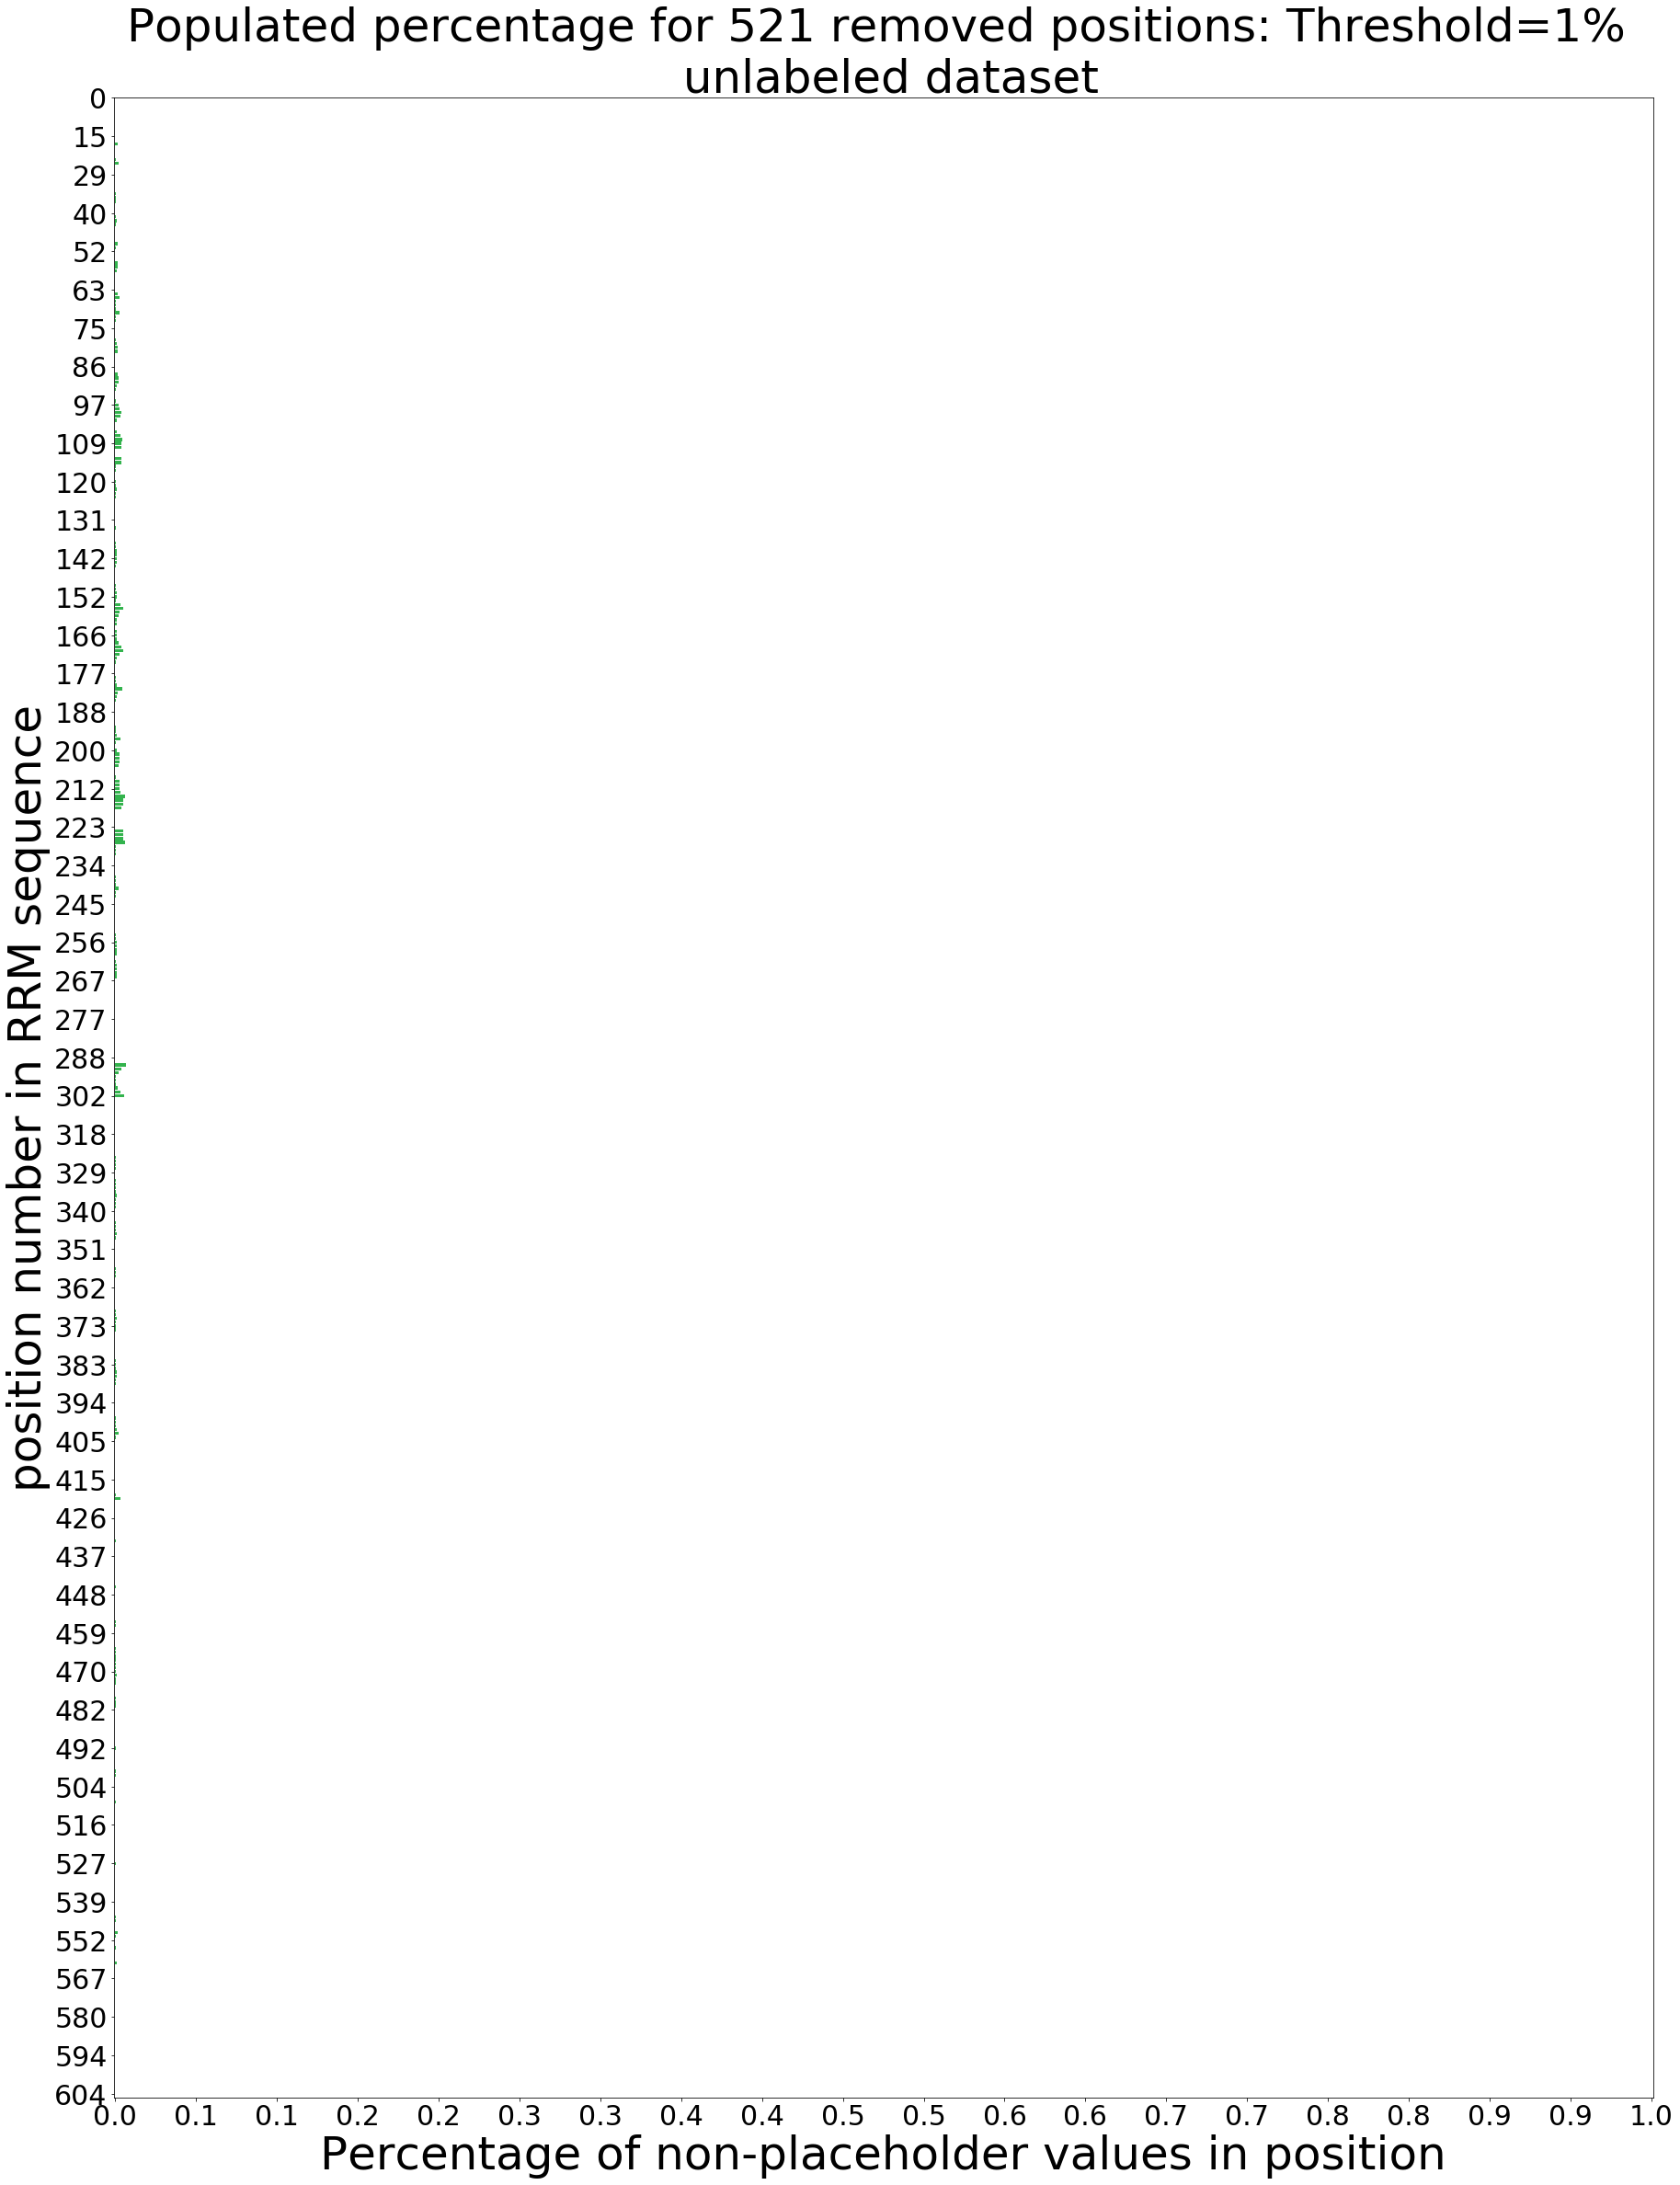

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
from operator import itemgetter 
import re
threshold = .01
def plot_num_population(df, threshold, positions, dataset='labeled dataset', kept=True):
    if kept:
        title = 'Populated percentage for %d kept positions: Threshold=%.0f%% \n %s'%(
            len(positions), threshold*100, dataset)
        color=[.2, .4, .7], 
    else:
        title = 'Populated percentage for %d removed positions: Threshold=%.0f%% \n %s'%(
            len(positions), threshold*100, dataset)
        color=[.2, .7, .3]
    
    pop_num = get_pop_percentage(df, positions)
    
    fig, ax = plt.subplots(figsize=(30, 40))
    y_pos = [np.floor(num) for num in np.linspace(0, len(pop_num), 50)]
    ax.barh(np.arange(0, len(pop_num)), pop_num, align='center', color=color)
    ax.invert_yaxis()    
    if kept:
        ax.set_yticks(np.arange(0, len(pop_num)))
        yticklabels = positions
    else:
        ax.set_yticks(np.arange(0, len(pop_num), 10))
        yticklabels = itemgetter(*[int(x) for x in np.arange(0, len(positions), 10)])(positions)
    ax.set_yticklabels(yticklabels, fontsize=30)
    ax.set_ylim([len(pop_num) + 1e-3, -1e-3])
    ax.set_ylabel('position number in RRM sequence', fontsize=50)
    ax.set_xlabel('Percentage of non-placeholder values in position', fontsize=50)
    ax.set_xlim([-1e-3, 1+1e-3]) 
    x_pos = np.linspace(0, 1, 20)
    ax.set_xticks(x_pos)
    x_pos = ["%.1f"%num for num in x_pos]
    ax.set_xticklabels(x_pos, fontsize=30)
    plt.title(title, fontsize=50)
    plt.show()
    fig.savefig('%s.png'%re.sub(' ', '_', title))
plot_num_population(unlabeled_RRM_original, threshold, removed_positions, dataset='unlabeled dataset', kept=False)
# plot_num_population(labeled_RRM_original, threshold, positions, dataset='labeled dataset', kept=True)  

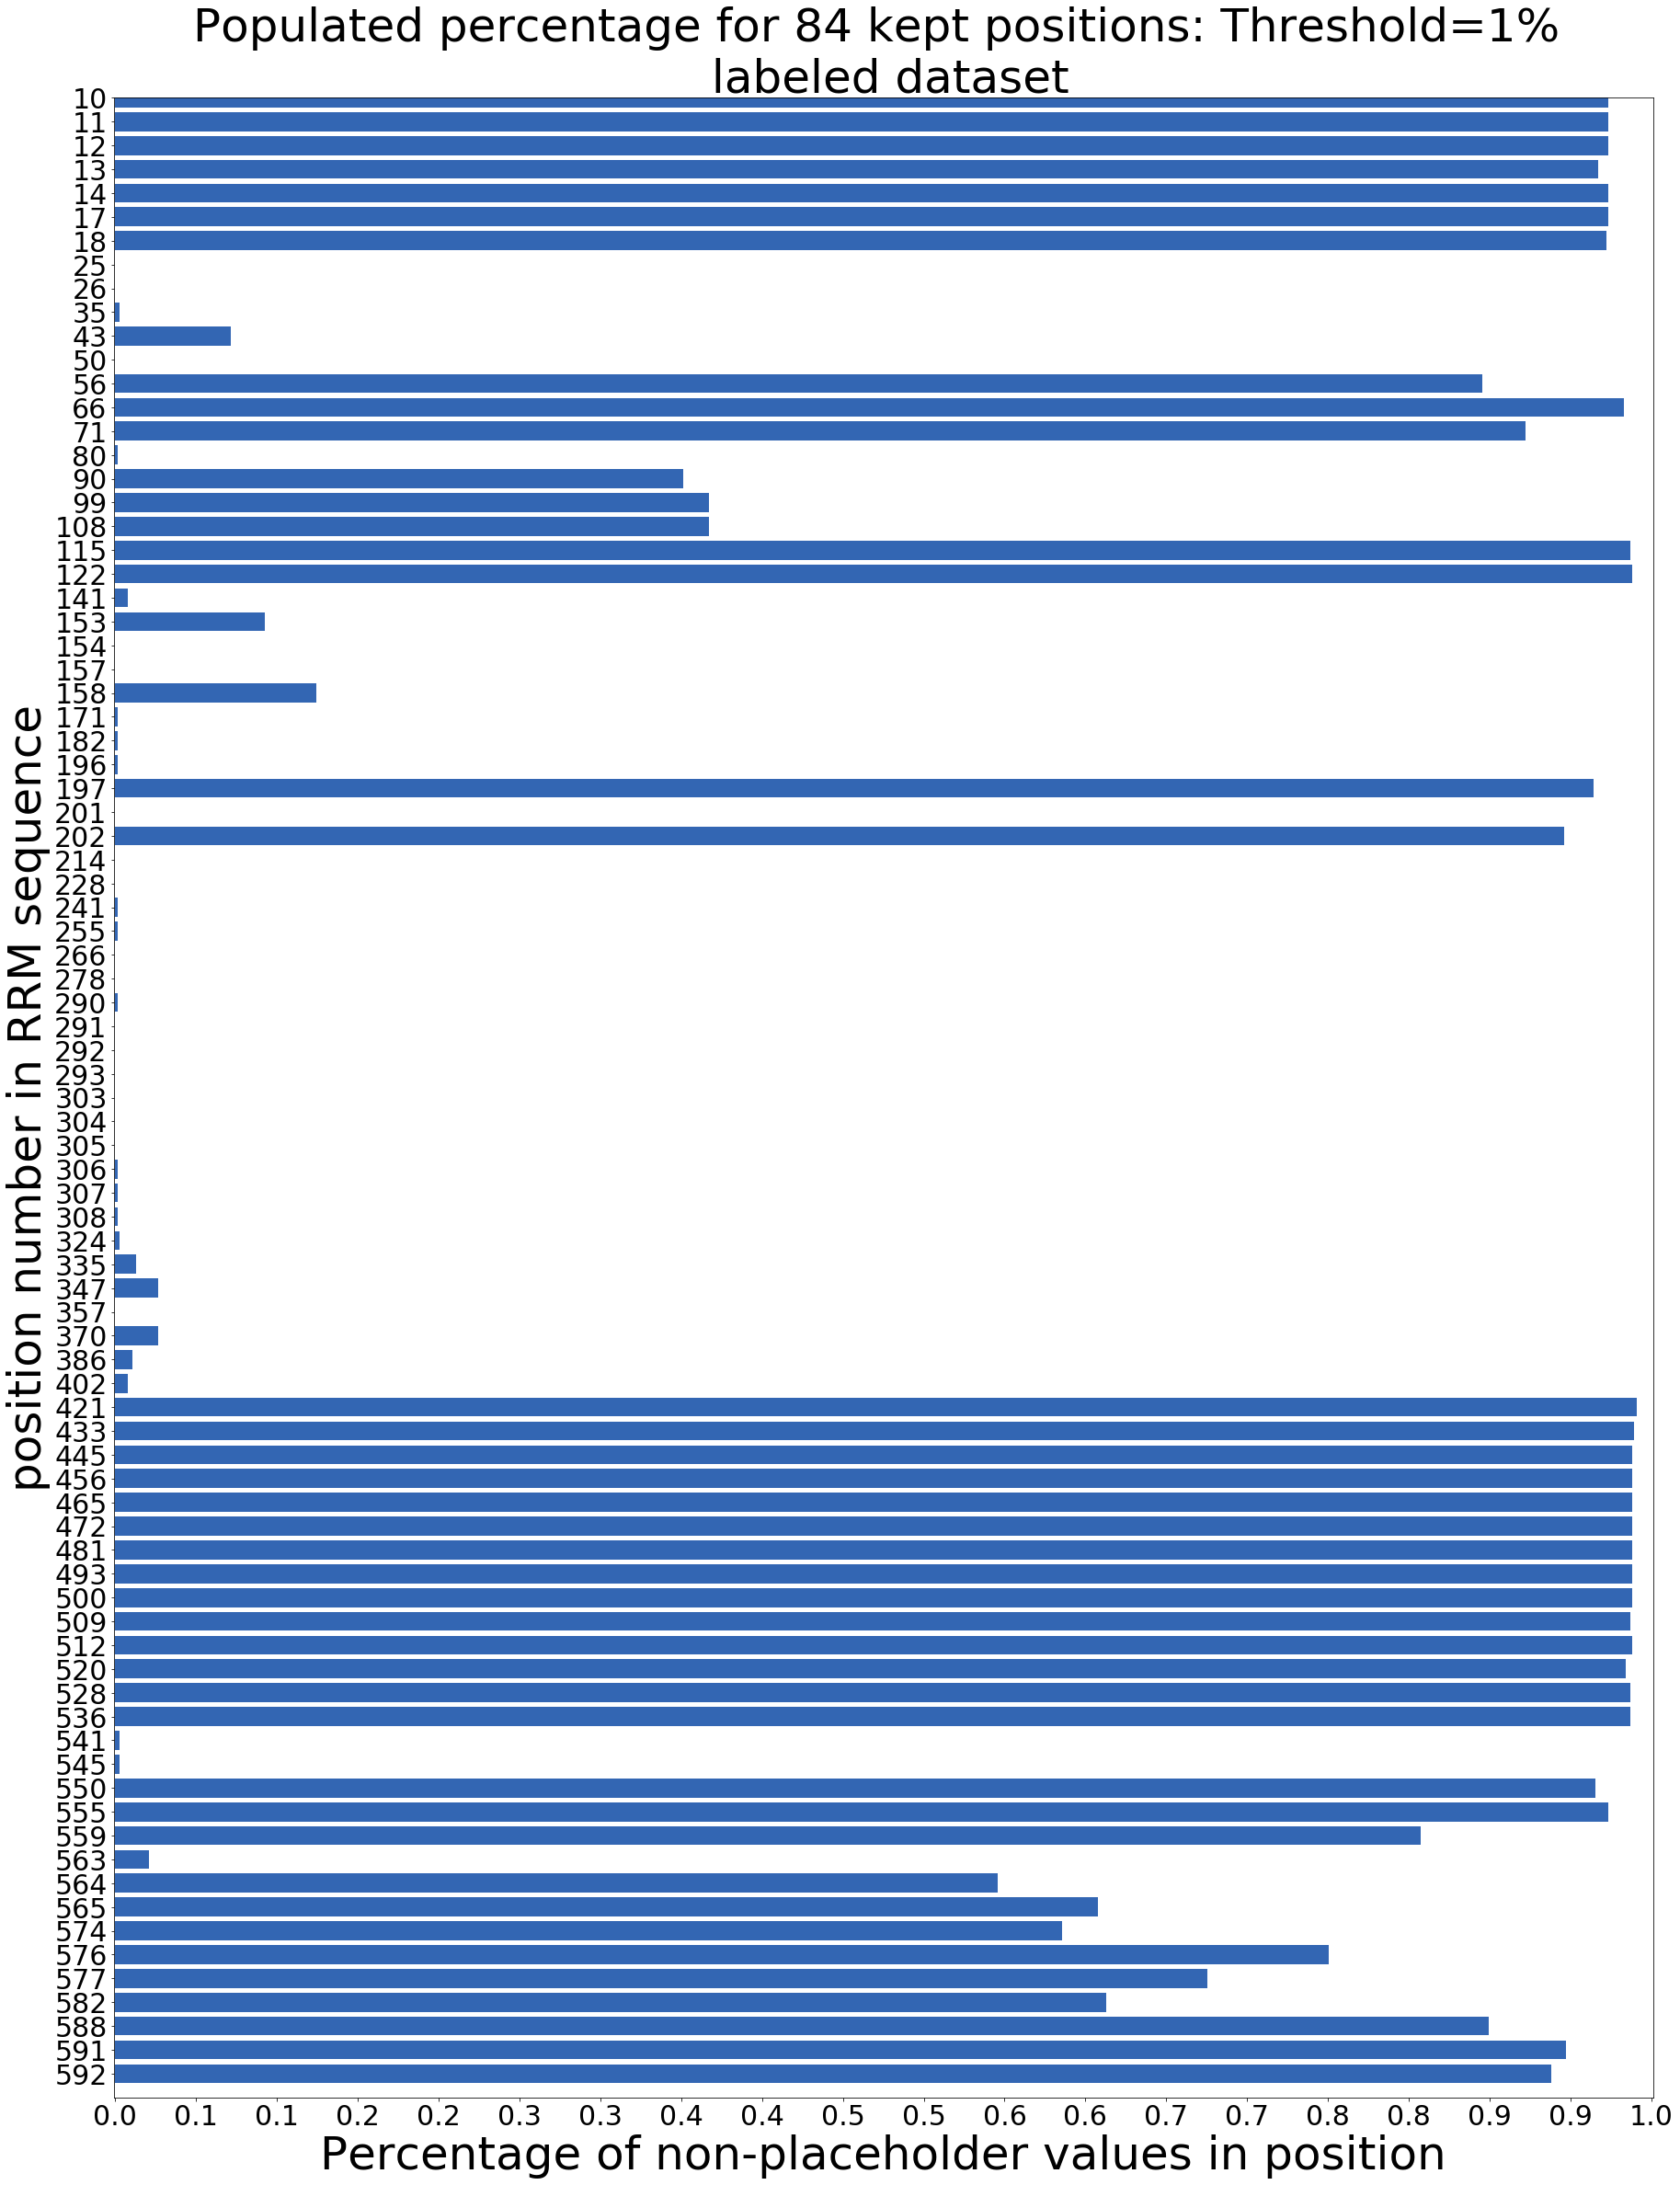

In [168]:
plot_num_population(labeled_RRM_original, threshold, positions, dataset='labeled dataset', kept=True)  

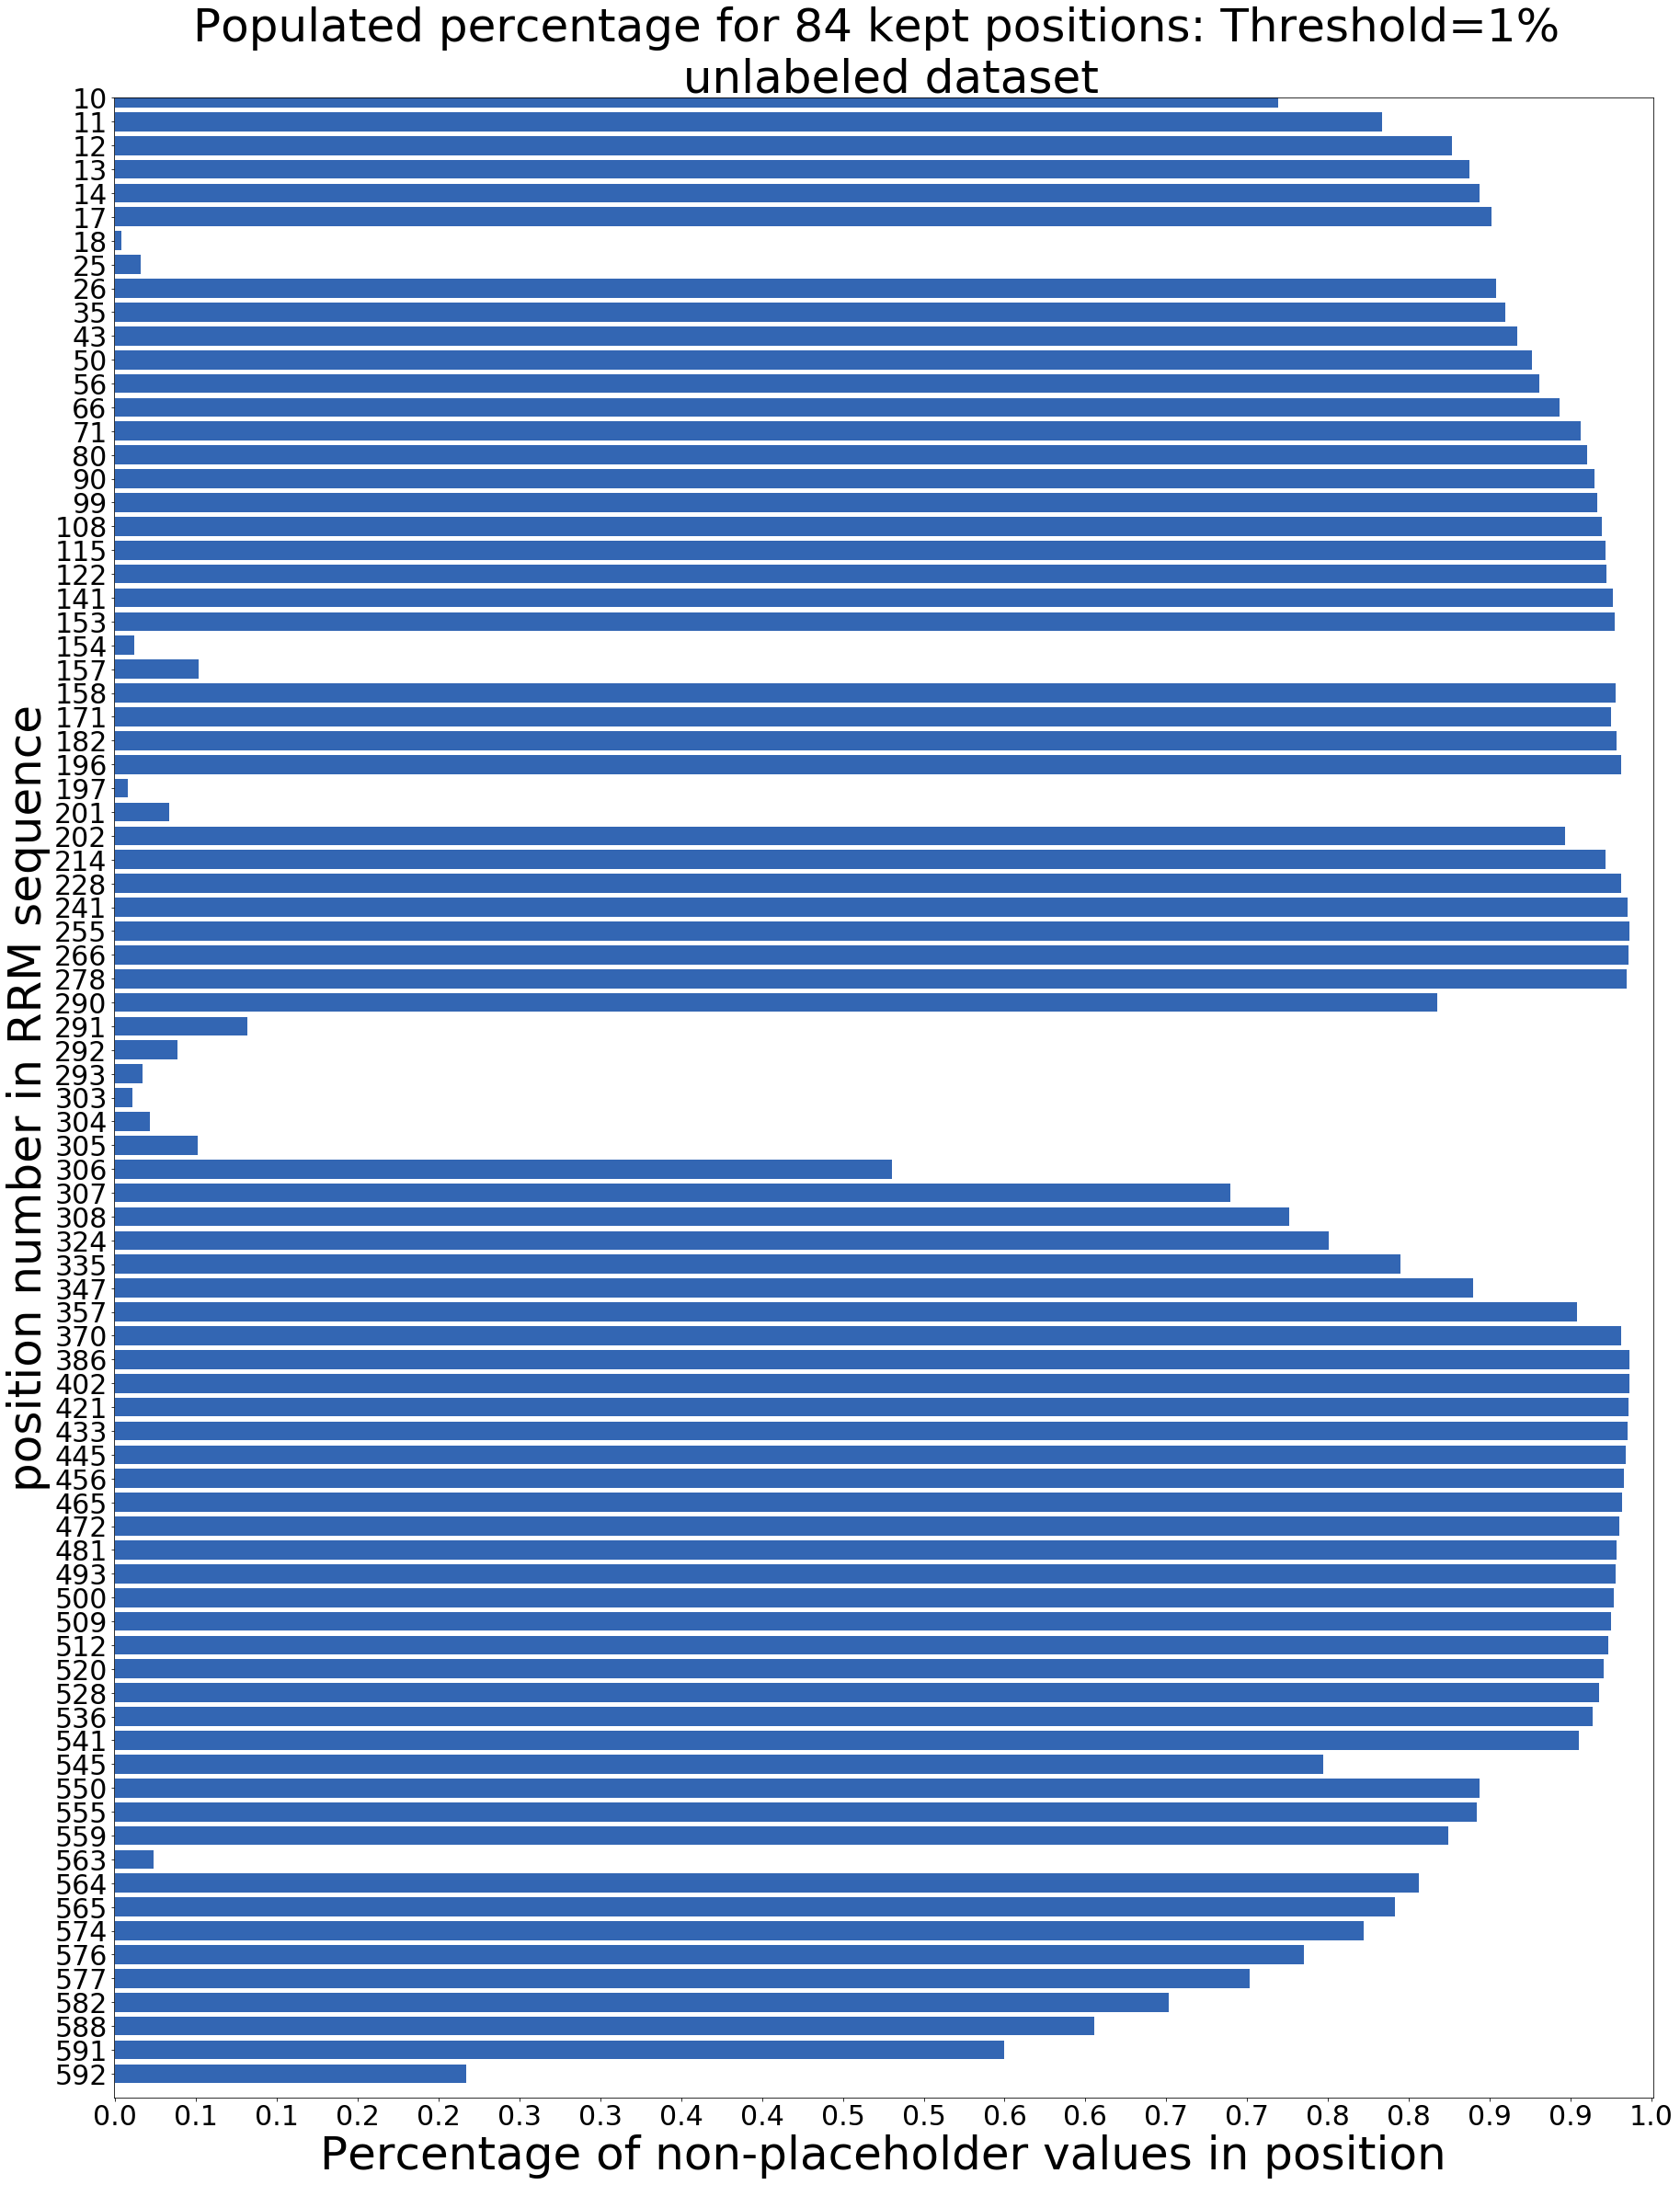

In [169]:
plot_num_population(unlabeled_RRM_original, threshold, positions, dataset='unlabeled dataset', kept=True)  

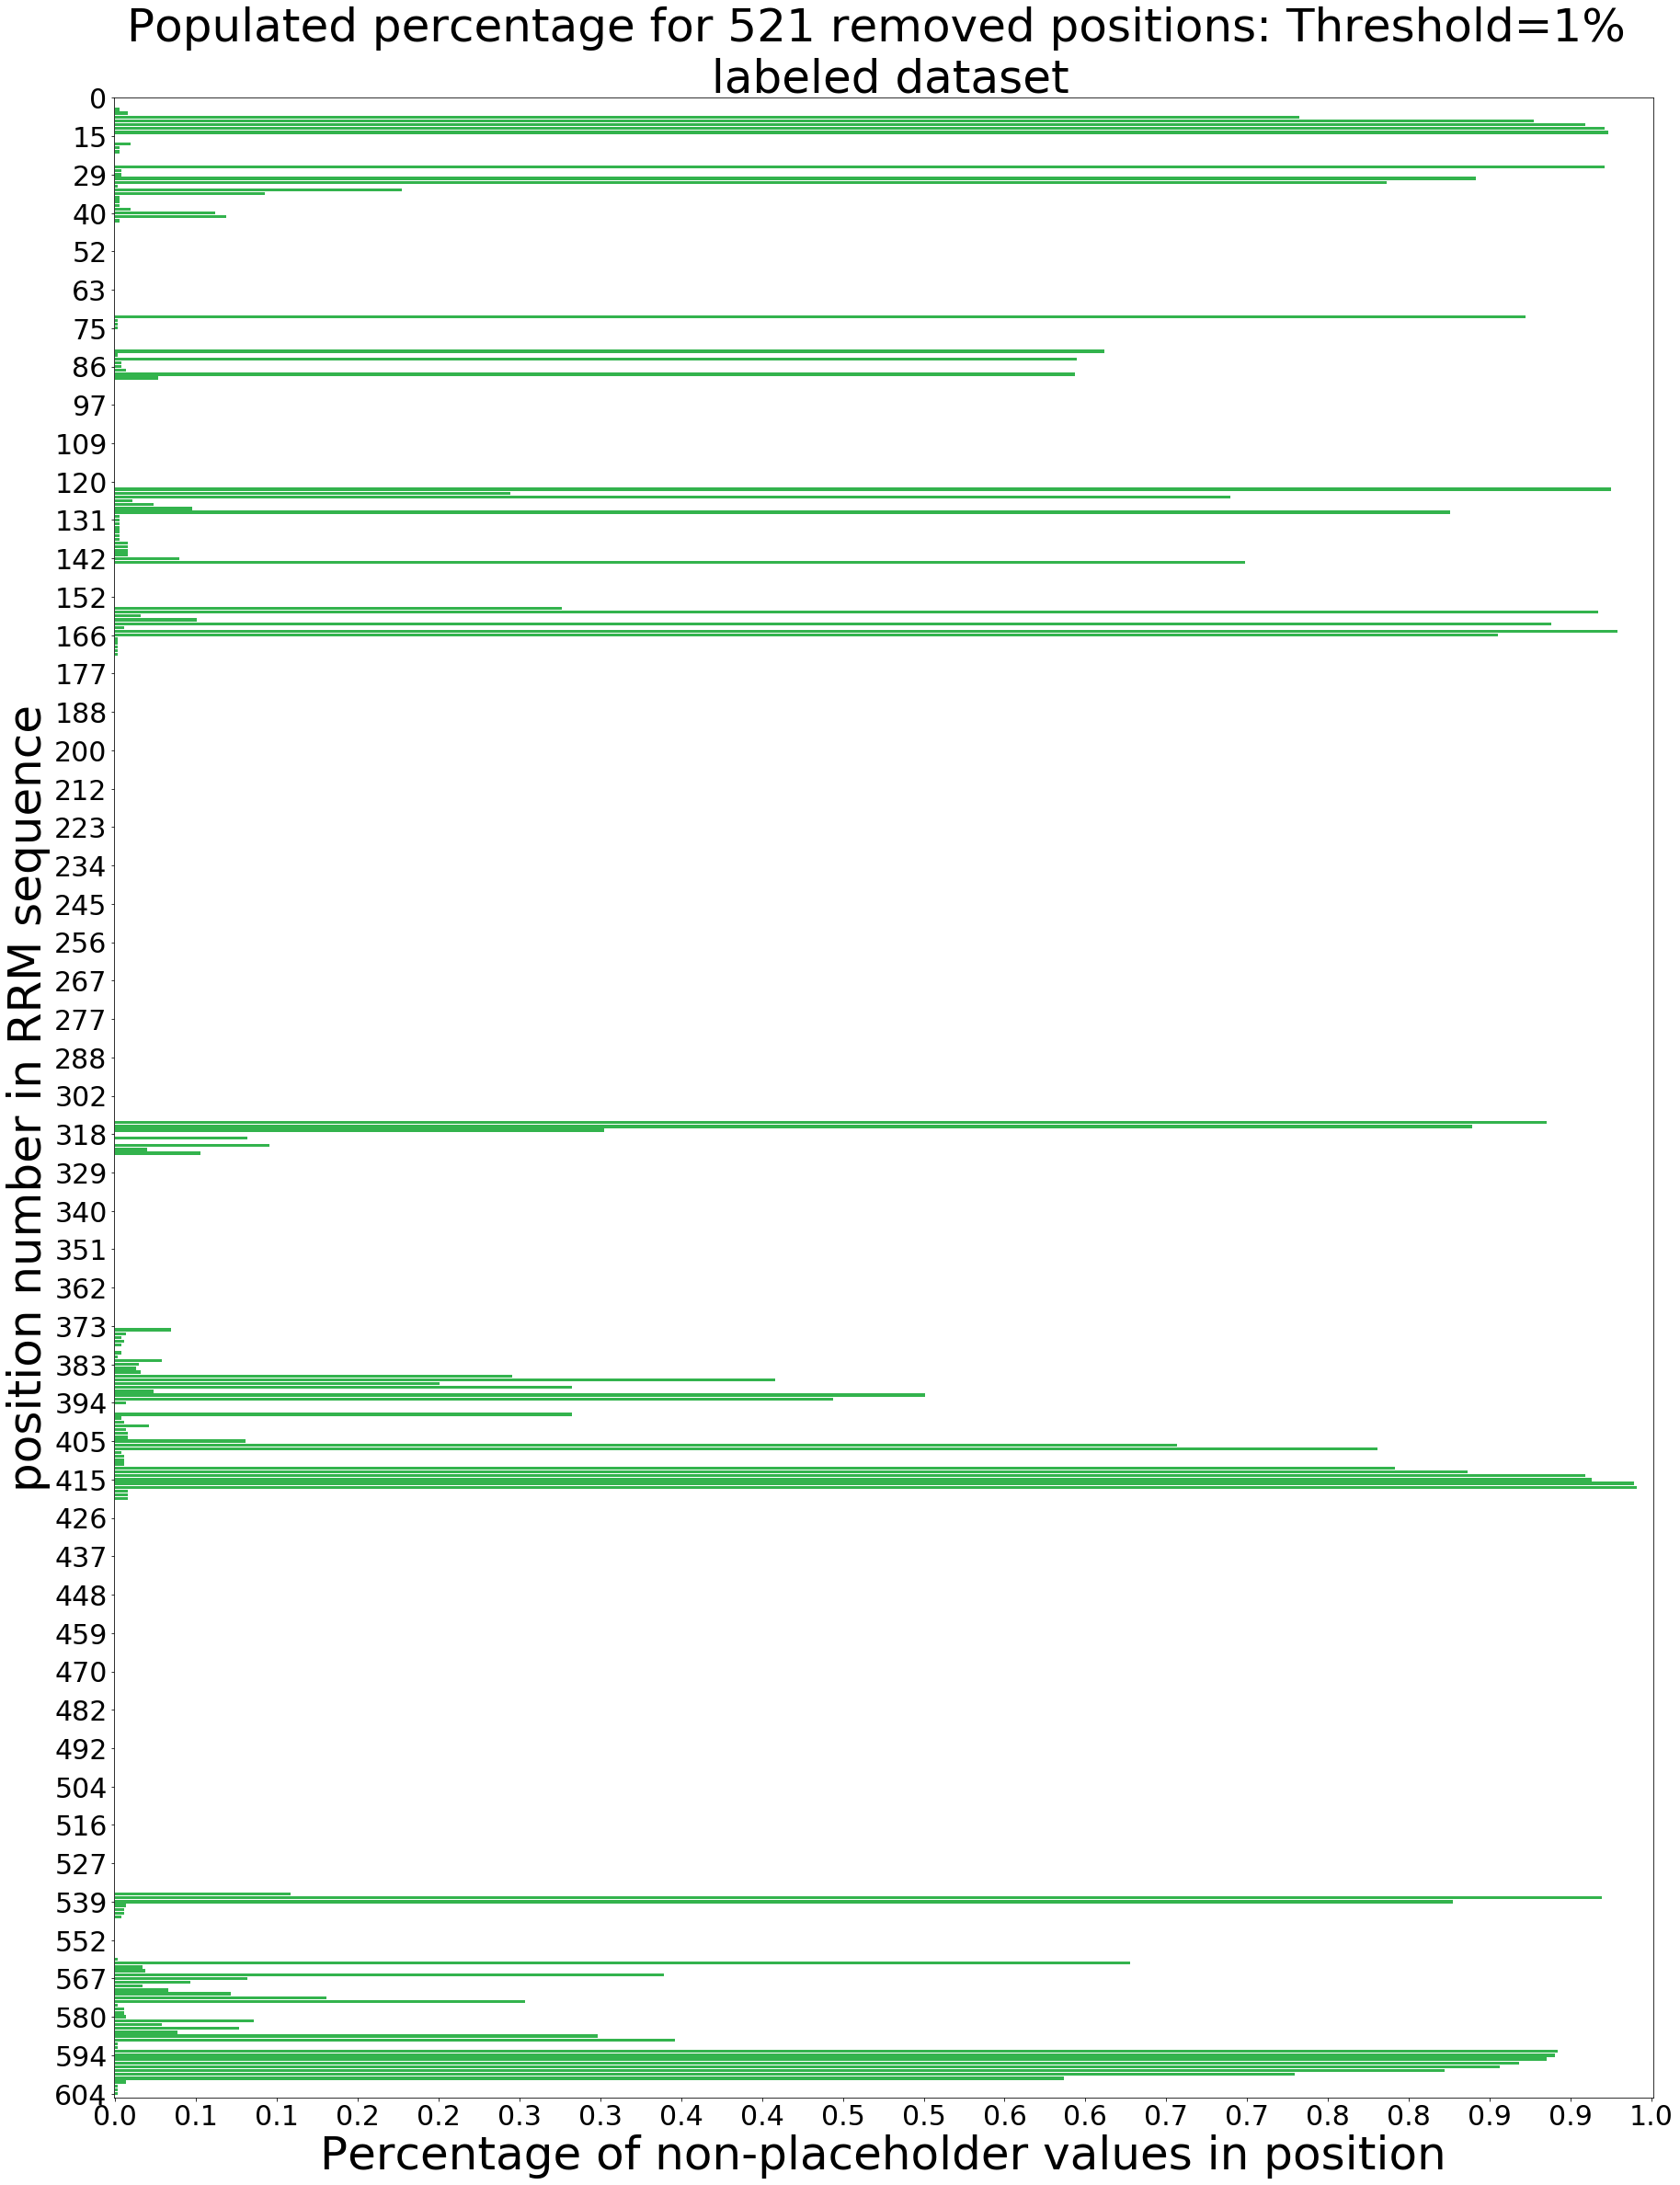

In [170]:
plot_num_population(labeled_RRM_original, threshold, removed_positions, dataset='labeled dataset', kept=False)

#### Getting representations into Affinity Regression format ####

In [139]:
def get_labeled_data(csv_file = 'decoder_reps_unaligned copy.csv', sep=','):
    
    ### Learned "hidden" representation ###
    hiddens=pd.read_csv(csv_file, index_col=0, sep=sep)
    try:
        labeled = hiddens[['||' in ind for ind in hiddens.index]]
    except:
        labeled  = hiddens[['||' in ind for ind in hiddens.name]]
    try:
        labeled['T_name'] = [name.split('||')[0] for name in labeled.name]
        labeled['R_name'] = [name.split('||')[1] for name in labeled.name]
        labeled = labeled.drop('name', 1)
    except:
        labeled['T_name'] = [name.split('||')[0] for name in labeled.index]
        labeled['R_name'] = [name.split('||')[1] for name in labeled.index]
        labeled.index = np.arange(labeled.shape[0])
    other_columns = labeled.columns.values.tolist()
    other_columns.remove('T_name')
    other_columns.remove('R_name')    
    labeled = labeled.reindex()
    labeled = labeled.loc[:, ['T_name', 'R_name']+other_columns]
    labeled = labeled.transpose()
    labeled.index = ['#']*2 + labeled.index[2:].tolist()
    labeled.to_csv(csv_file.split('.')[0]+'.txt', sep=' ', header=False)

#dec_un_reload = pd.read_csv('decoder_reps_unaligned.txt', sep=' ', header=None)

get_labeled_data(csv_file = 'Seq2Vec_64Dim.csv', sep='\t')
get_labeled_data(csv_file = 'decoder_reps_unaligned.csv')
get_labeled_data(csv_file = 'hiddens2.csv')
get_labeled_data(csv_file = 'encoder_reps_unaligned.csv')
get_labeled_data(csv_file = 'encoder_reps_aligned_24hrs.csv')
get_labeled_data(csv_file = 'CharLvlNMT_64_v1.csv', sep='\t')
get_labeled_data(csv_file = 'Seq2Vec_128Dim.csv', sep='\t')
get_labeled_data(csv_file = 'CharLvlNMT_128_v1.csv', sep='\t')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

FileNotFoundError: File b'CharLvlNMT_128_v1' does not exist

In [140]:
get_labeled_data(csv_file = 'CharLvlNMT_128_v1.csv', sep='\t')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [141]:
Alex.shape

(8002, 408)

In [133]:
Alex.head()

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,#,T115645_1.92d,T080691_1.92d,T002501_1.92d,T111509_1.92d,T073162_1.92d,T041620_1.92d,T111417_1.92d,T129636_1.92d,T069676_1.92d,...,T42887_0.6,T42914_0.6,T42910_0.6,T36184_0.6,T32682_0.6,T42067_0.6,T33620_0.6,T37595_0.6,T42847_0.6,T37624_0.6
1,#,RNCMPT00301,RNCMPT00306,RNCMPT00309,RNCMPT00311,RNCMPT00323,RNCMPT00324,RNCMPT00325,RNCMPT00326,RNCMPT00329,...,RNCMPT00280,RNCMPT00281,RNCMPT00282,RNCMPT00283,RNCMPT00284,RNCMPT00285,RNCMPT00287,RNCMPT00288,RNCMPT00289,RNCMPT00291
2,AAA,2,0,0,0,1,1,0,1,0,...,2,1,0,0,0,0,0,1,1,1
3,AAR,0,0,0,0,0,0,1,0,0,...,1,1,0,1,1,1,0,1,2,1
4,AAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Alex = pd.read_csv('Proteindomains_fullset_gapped4-1merfeatures.txt_4mer_features.txt', sep=' ', header=None)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,

In [143]:
seq2vec = pd.read_csv('Seq2Vec_64Dim.txt', sep=' ')
seq2vec

,#,T080824,T117424,T117424.1,T080738,T105643,T002501,T080661,T090313,T081209,...,T111417.2,T115630.2,T115680.2,T079104.1,T080661.3,T080743.3,T088518.1,T105248.1,T073119.1,T080729.2
0,#,RNCMPT00434_RRM__0_0,RNCMPT00259_RRM__0_0,RNCMPT00259_RRM__1_0,RNCMPT00001_RRM__0_0,RNCMPT00482_RRM__0_0,RNCMPT00309_RRM__0_0,RNCMPT00004_RRM__0_0,RNCMPT00080_RRM__0_0,RNCMPT00760_RRM__0_0,...,RNCMPT00325_RRM__2_0,RNCMPT00183_RRM__2_0,RNCMPT00470_RRM__0_0,RNCMPT00248_RRM__1_0,RNCMPT00004_RRM__3_0,RNCMPT00153_RRM__2_0,RNCMPT00245_RRM__1_0,RNCMPT00203_RRM__0_0,RNCMPT00433_RRM__0_0,RNCMPT00187_RRM__2_0
1,0,0.3171225148909919,-0.04176667803853195,-0.019952652226961683,0.3476357213302021,0.17162812058978602,-0.3868153735827145,0.7223685047783421,0.13801500878585632,0.08247762589648935,...,0.001575145050637728,-0.3492106123234266,0.7301123904622526,-0.04858334767450493,-0.4975340662447289,-0.15989302797748836,0.20158270790831664,0.8160361501194395,0.7010348740678755,-0.5350350418879599
2,1,0.3601892619503628,0.6088737185846502,0.9799636322099108,-0.275652715526536,0.7122406492730115,0.2354755063775841,0.2622957412440442,0.43550834226840346,0.6017089110617064,...,0.9431687233334368,0.9940345994246024,0.35528613085932903,0.04781376552806271,1.1057806703495259,0.1976232080500712,0.2798539531159244,0.7456700578182701,-0.7321147537780226,1.5401988389943575
3,2,0.030851439711658525,0.5842405618913455,0.4088889996883909,0.0370694460397176,0.080767778777134,0.17274658624158412,0.5576377488263161,0.3761908408265912,-0.2569719958894025,...,0.6514152744895034,0.053509579542428465,-0.3576046002760787,0.1639241397447927,-0.17573600681400947,0.16496120795268596,0.7771390325071977,0.3861129468465701,-0.5016047922665434,-0.030880759469779542
4,3,-0.4699234520788401,-0.032591571405047606,-0.08048335819982633,0.003125174539086078,-0.03143260991850068,0.3852216315760276,0.3320681909935531,-0.2603826180776601,0.12118936503951848,...,-0.3709438505231801,0.19067221599366246,-0.10086155347808694,-0.20503909987417104,0.005620322555688321,-0.22796444584847206,-0.7473653741504546,-0.5467174648032007,-0.2304087836630712,-0.4754589430107176
5,4,0.07909580958411712,-0.16364122415795154,-0.2004943786148025,0.6054141577377536,0.104821873029067,0.1525935103605333,0.11377972527031402,0.4115606319584436,-0.03194400091820061,...,0.23734379728956226,-0.4902074781914698,0.3707472769939262,0.0003043840226907343,-0.599640458375837,0.7356714020819591,0.3814561335519025,0.8121389546243506,-0.2516301471445182,-0.8471411399047172
6,5,-0.4665555389674017,-0.4817620119122386,-0.3379125240104545,-0.4656769390535874,0.13663101031273,0.029653930868705394,-0.7287913015176581,-0.6548876746424135,-0.5732874121110301,...,-0.07757938480575316,-0.9432514358676188,-0.2756070679434691,-0.7972063917798429,-0.8743694857866893,-0.5122058635312438,0.555258819448248,-0.02952490258151682,-0.7266095906311149,-0.6416574738509325
7,6,-0.11880503516272918,-0.7744928710087019,-0.4202562996981661,-0.3501663952592722,0.2309374662222424,0.03319338817287537,-0.5192243438651947,-0.12385377939881405,-0.43094641819653823,...,0.2728657514207713,-0.2760354826540017,0.6016608256696614,-0.2641698526373993,-0.09114412380234968,0.7484961352637998,-0.06572801041432802,0.006219724318863681,-0.007484659845634366,-0.2246572226102924
8,7,0.3313910507806781,-0.04678829803471039,0.9348293933314324,0.14571222799416034,0.2585920806503149,0.6066751161153288,-0.13440679896478855,0.29602045202568794,-0.2731083839744713,...,-0.2827479818499989,-0.31918596681357003,0.026526599194391653,0.32501723492507995,-0.4643989273715177,0.30158897469285023,-0.5602244786019813,0.39413332934480894,-0.1242540991779414,-0.2471480097480631
9,8,0.18605080369560853,0.21539318434494995,-0.025547634839080062,-0.19769835954104034,0.06887689550100952,0.13266328034362793,-0.1134819003159086,-0.024383556096967855,0.20718765171391745,...,-0.4528409818135654,-0.31640770743780666,0.18700286592054952,-0.4291957712185971,-0.19857369914999845,0.7171391961256677,-0.175230781